[[1.  1.  2. ]
 [1.  2.  5. ]
 [1.  2.5 3.6]
 [1.  4.1 4.9]
 [1.  3.  2. ]
 [1.  4.  3. ]
 [1.  5.  2.1]
 [1.  1.  0.1]]


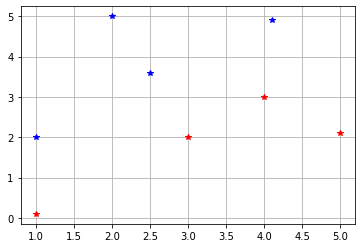

In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

#think of the data as being linearly sepearated by y=x
#let (x,y) be in [0,5] x [0,5]

#Build Class 0 as a matrix
data0=np.matrix([[1,1,2],
                 [1,2,5],
                 [1,2.5,3.6],
                 [1,4.1,4.9]])

#Build Class 1 as a matrix

data1 = np.matrix([[1,3,2],
                   [1,4,3],
                   [1,5,2.1],
                   [1,1,0.1]])

#concatenate the matrices to build the dataset
data=np.concatenate((data0,data1), axis=0)

print(data)

#build the target array (easiest to build as a matrix with one row and then transpose)

target = np.matrix([[0,0,0,0,1,1,1,1]])
target = np.transpose(target) #for future use
#visualize your data
plt.plot(data0[:,1],data0[:,2],'b*',data1[:,1],data1[:,2],'r*')
plt.grid()

In [0]:
def sigmoid(z):
  return( 1 / (1 + np.exp(-z) ) )

def cost(Target,P):
  c1 = -np.transpose(Target) * np.log(P)
  c2 = -np.transpose(1-Target) * np.log(1-P)
  c = c1 + c2
  return( c.item() )

def gradCost(w,Data,Target):
  yhat = sigmoid( Data * w )
  class_error = np.array(yhat - Target)
  return np.transpose(np.transpose(class_error) * Data)

## Outline of Perceptron Code:

1. Build a Python function for the sigmoid. 
2. Build a Python function for the gradient of the cost 
3. *While we're at it, we should build the log loss function.*
4. Build our weight vector ... these will be initialized randomly. 
5. **Now we need a loop to do gradient descent.**
$$w_{n+1} = w_n-\alpha \frac{\nabla\text{Cost}}{\|\nabla\text{Cost}\|}$$
6. Evaluate the cost over the course of the gradient descent
7. Evaluate the quality of the final model when the gradient descent is done.

The goal is to find the line $y=x$ 

In [8]:
w = np.random.rand(3,1) # 3x1 matrix of random weights from a unit interval according to a uniform distribution

eta = 0.1 # learning rate?
N = 200 # number of iterations (epochs)
costValues = [0] * N #initialize the costs at each epoch
for j in range(N):
  # get the gradient
  # update the weights (grad. descent algorithm)
  # get the predictions
  # get the cost for those predictions
  # calculate the misclassification rate

  G = gradCost(w,data,target) #gradient
  w = w - eta * G / np.linalg.norm(G)
  P = sigmoid(data * w) # all the predictions
  costValues[j] = cost(target,P) # go get the cost for these predictions
  misclasses = np.sum(np.round(P,0) != target)/len(P) # this gives us error rate percentage
  if j%25 == 0: # print every 25th step
    print("Progress (",j,"): Cost = ",costValues[j]," Misclass Rate =",misclasses)




Progress ( 0 ): Cost =  21.4965237267471  Misclass Rate = 0.5
Progress ( 25 ): Cost =  1.9262972162340222  Misclass Rate = 0.0
Progress ( 50 ): Cost =  0.3701846902548589  Misclass Rate = 0.0
Progress ( 75 ): Cost =  0.0685663161493671  Misclass Rate = 0.0
Progress ( 100 ): Cost =  0.016572613133387794  Misclass Rate = 0.0
Progress ( 125 ): Cost =  0.0048760265991272984  Misclass Rate = 0.0
Progress ( 150 ): Cost =  0.0014800938550338883  Misclass Rate = 0.0
Progress ( 175 ): Cost =  0.00046290537722415843  Misclass Rate = 0.0


Text(0, 0.5, 'log loss cost function')

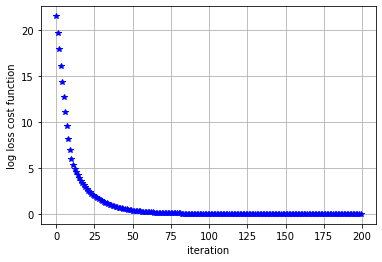

In [10]:
plt.plot(range(N),costValues,'b*')
plt.grid()
plt.xlabel("iteration")
plt.ylabel("log loss cost function")

In [11]:
print("Final Weights Are: w = \n",w)

Final Weights Are: w = 
 [[  1.67517331]
 [ 10.49259811]
 [-11.26830587]]
